# Numerical Methods of Optimal Control Part-1

- Sarder Rafee Musabbir

- UC Davis Intelligent Mobility Laboratory (IMobiL)

- Advisor: Prof. Michael Zhang



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import control.optimal as opt
ct.use_fbs_defaults()

# Presentation Goals
1. How to form an optimal control problem?
2. What are the direct methods to solve the optimal control problem numerically?
4. Which methods are in common in practice and easy to implement?
5. How to transform the optimal control problem to nonlinear optimization problem?

# Prerequisite to Solve a Optimal Control Problem
1. Numerical Methods of optimization
    * Bisection Method,
    * Newton Method,
    * Secant Method, etc.
2. Convex Optimization
3. **Non-Linear Optimization**
4. Mixed Integer Programming

<img style="float: center;" src="Images_Extracted/Optimal_Control_view.png" width=1800 height=1800>

<img style="float: center;" src="Images_Extracted/Optimal_Control_image.png" width=1500 height=1500>

<img style="float: center;" src="Images_Extracted/Transcription.png" width=1500 height=1500>

<img style="float: center;" src="Images_Extracted/Transcription_Methods.png" width=2000 height=2000>

<img style="float: center;" src="Images_Extracted/direct_transcription.png" width=1500 height=1500>

# Some Core Concept Recap
1. Discrete control
2. Continuous control



# Discrete Control


The **Optimal Control** problem can be formalized using **Dynamic Programming** concept as follows: find an action sequence $(u_0, u_1,...u_{n-1})$ and corresponding state sequence $(x_0, x_1,...x_{n-1})$ minimizing the total cost:

$$J(x,u) = \sum_{k=0}^{n-1} \text{cost}(x_k,u_k)$$

where, $x_{k+1} = \text{next} (x_k, u_k)$ and $u_k \in \mathcal{U}(x_k)$. The initial state $x_0 = x^{\text{init}}$ and destination state $x_n = x^{\text{dest}}$ are given.


## Dynamic Programming

Dynamic Programming (DP) relies on the following obvious fact: if a given state-action sequence is optimal, and we were to remove the first state and action, the remaining sequence is also optimal (with the second state of the original sequence now acting as initial state). This is the Bellman optimality principle. 

Note the close resemblance to the Markov property of stochastic processes (a process is Markov if its future is conditionally independent of the past given the present state). 


+ **optimality principle**: the choice of optimal actions in the future is independent of the past actions which led to the present state. 
+ optimal state-action sequences can be constructed by starting at the final state and extending backwards. 
+ Key to this procedure is the optimal value function (or optimal cost-to-go function)

$v(x) =$ minimal total cost for completing the task starting from state $x$


## Bellman Equation 

+ value function captures the long-term cost for starting from a given state, and makes it possible to find optimal actions through the following algorithm

+ **Consider every action available at the current state, add its immediate cost to the optimal value of the resulting next state, and choose an action for which the sum is minimal.**

+ The above algorithm is *"greedy"* in the sense that actions are chosen based on local information, without explicit consideration of all future scenarios. 

+ This is possible because the optimal value function contains all information about future scenarios that is relevant to the present choice of action.** 

**Bellman Equation:**
$$v(x) = \arg \min_{u \in \mathcal{U}(x)} \Big\{ \text{cost} (x, u) + v (\text{next} (x, u)) \Big\}$$

**Value iteration** uses only $v(x)$. We start with a guess $v^{0}$ of the optimal value function, and construct a sequence of improved guesses:

$$v^{i+1}(x) = \min_{u\in \mathcal{U}(x)} \Big\{ \text{cost}(x,u) + v^i (next (x,u)) \Big\}$$

This process is guaranteed to converge to the optimal value function $v$ in a finite number of iterations. 

The algorithm yields an optimal action $u = \pi (x) \in U(x)$ for every state $x$. A
mapping from states to actions is called control law or control policy. Once we have a control law $\pi : \mathcal{X} \rightarrow \mathcal{U}(\mathcal{X})$ we can start at any state $x_0$, generate action $u_0 = \pi(x_0)$, transition to state $x_1 = \text{next} (x_0, u_0)$, generate action $u_1 = \pi(x_1)$, and keep going until we reach $x^{\text{dest}}$.
Formally, an optimal control law $\pi$ satisfies,

$$\pi(x) = \arg \min_{u \in \mathcal{U}(x)} \Big\{ \text{cost} (x, u) + v (\text{next} (x, u)) \Big\}$$


The minimum in (1) may be achieved for multiple actions in the set $\mathcal{U}(x)$, which is why $\pi$ may not be unique. However the optimal value function $v$ is always uniquely defined, and satisfies,

$$v(x) = \arg \min_{u \in \mathcal{U}(x)} \Big\{ \text{cost} (x, u) + v (\text{next} (x, u)) \Big\}$$


Equations (1) and (2) are the **Bellman equations**.
If for some $x$ we already know $v (\text{next} (x, u))$ for all $u \in \mathcal{U}(x)$, then we can apply the Bellman equations directly and compute $\pi(x)$ and $v(x)$. Thus dynamic programming is particularly simple in acyclic graphs where we can start from $x^{dest}$ with $v (x^{dest}) = 0$, and perform a backward pass in which every state is visited after all its successor states have been visited. It is straightforward to extend the algorithm to the case where we are given non-zero final costs for a number of destination states (or absorbing states).

## Value iteration and Policy iteration
The situation is more complex in graphs with cycles. Here the Bellman equations are
still valid, but we cannot apply them in a single pass. This is because the presence of cycles makes it impossible to visit each state only after all its successors have been visited.
Instead the Bellman equations are treated as consistency conditions and used to design iterative relaxation schemes-much like partial di⁄erential equations (PDEs) are treated as consistency conditions and solved with corresponding relaxation schemes. By "relaxation scheme" we mean guessing the solution, and iteratively improving the guess so as to make it more compatible with the consistency condition.

The two main relaxation schemes are value iteration and policy iteration. Value iteration uses only $v(x)$. We start with a guess $v^{0}$ of the optimal value function, and construct a sequence of improved guesses:

$$v^{i+1}(x) = \min_{u\in \mathcal{U}(x)} \Big\{ \text{cost}(x,u) + v^i (next (x,u)) \Big\}$$

This process is guaranteed to converge to the optimal value function $v$ in a finite number of iterations. 

# Continuous Control

We now turn to optimal control problems where the state $\mathbf{x} \in \mathbb{R}^{nx}$ and control $\mathbf{u} \in \mathcal{U}(x) \in \mathbb{R}^{n_u}$ are real-valued vectors. To simplify notation we will use the shortcut $\min_u$ instead of $\min_{u\in \mathcal{U}}$, although the latter is implied unless noted otherwise. consider the stochastic differential equation,

$$\text{stochastic dynamics:} \quad d\mathbf{x} = \mathbf{f}(\mathbf{x}, \mathbf{u}) dt + F (\mathbf{x}, \mathbf{u}) d\mathbf{w}$$

where, $d\mathbf{w}$ is $n_w-$dimensional Brownian motion. This is sometimes called a controlled Ito diffusion, with $f(\mathbf{x},\mathbf{u})$ being the drift and $F(\mathbf{x}, \mathbf{u})$ the diffusion coefficient. 

$\text{Meaning of the Dynamics:} \quad \mathbf{x}(t) = \mathbf{x}(0) + \int_{0}^{t} \mathbf{f}(\mathbf{x}(s), \mathbf{u}(s)) ds + \int_{0}^{t} F(\mathbf{x}(s), \mathbf{u}(s))d\mathbf{w}(s)$


$$\text{Cost in Continuous time:} \quad J(\mathbf{x}(\cdot), \mathbf{u}(\cdot)) = h(\mathbf{x}(t_f)) + \int_{0}^{t_f} \ell (\mathbf{x}(t), \mathbf{u}(t), t) dt$$


Objective is to find the control law $\mathbf{u} = \pi (\mathbf{x},t)$ that minimizes the expected total cost $\mathbf{J}$ for starting at a given $(\mathbf{x},t)$




## How to Discretize?

$$\text{Euler Discretization:} \quad \mathbf{x}_{k+1} = \mathbf{x}_k + \Delta f(\mathbf{x}_k, \mathbf{u}_k) + \sqrt\Delta F (\mathbf{x}_k, \mathbf{u}_k)\varepsilon_k$$

where $\Delta$ is the time step, $\varepsilon_k \sim \mathcal{N}(0, I^{n_w})$ and $\mathbf{x}_k = \mathbf{x}(k \Delta)$. The $\sqrt\Delta$ term appears because
the variance of Brownian motion grows linearly with time, and thus the standard deviation of the discrete-time noise should scale as $\sqrt\Delta$.

$$\text{Cost in Discrete time:} \quad J(\mathbf{x.}, \mathbf{u.}) = h(\mathbf{x_n}) + \Delta \sum_{k=0}^{n-1} \ell (\mathbf{x_k}, \mathbf{u_k}, k\Delta)$$

$$\text{number of time steps:} \quad n=t_f/\Delta$$
$$\text{final cost:} \quad h(\mathbf{x_n})$$


## Hamilton-Jacobi-Bellman eqn.

**Stochastic Dynamics**
$$v(\mathbf{x}, k) = \min_{\mathbf{u}} \Big\{ \Delta \ell(\mathbf{x}, \mathbf{u}, k\Delta) + E \big[ v (\mathbf{x} + \Delta f(\mathbf{x}, \mathbf{u}) + \xi, \ k+1) \big] \Big\}$$

Consider the second-order Taylor-series expansion of $v$, with the time index $k+1$ suppressed for clarity:
$$v(\mathbf{x} + \delta) = v(\mathbf{x}) + \delta^T v_{\mathbf{x}}(\mathbf{x}) + \frac{1}{2} \delta^T v_{\mathbf{x}\mathbf{x}} (\mathbf{x}) \delta + o(\delta^3)$$
$$\delta = \Delta f(\mathbf{x}, \mathbf{u}) + \xi, \quad v_{\mathbf{x}}=\frac{\partial v}{\partial \mathbf{x}}, \quad v_{\mathbf{x}\mathbf{x}}=\frac{\partial^2 v}{\partial \mathbf{x} \partial \mathbf{x}}$$


The trace term appears because,

$$E\big[ \xi^T v_{\mathbf{x}\mathbf{x}} \xi\big] = E \big[tr(\xi \xi^T v_{\mathbf{x}\mathbf{x}}) \big] = tr\big( \text{Cov} [\xi] v_{\mathbf{x}\mathbf{x}} \big) = tr(\Delta S v_{\mathbf{x}\mathbf{x}})$$

In the limit $\Delta \rightarrow 0$ the latter expression becomes $-\frac{\partial v}{\partial t}$, which we denote $-v_t$. 

$$v_t(\mathbf{x},t) = \min_{\mathbf{u} \in \mathcal{U}(x)} \Big\{ \ell (\mathbf{x}, \mathbf{u}, t) + f(\mathbf{x}, \mathbf{u})^T v_{\mathbf{x}} (\mathbf{x}, t) + \frac{1}{2} tr(S(\mathbf{x}, \mathbf{u}) v_{\mathbf{x}\mathbf{x}}(x,t)) \Big\}$$

## Derivation of the HJB equations

The state transitions are now stochastic: the probability distribution of $x_{k+1}$ given $x_k, u_k$ is the multivariate Gaussian

$$\mathbf{x}_{k+1} \sim \mathcal{N} \big( \mathbf{x}_k + \Delta f(\mathbf{x}_k, \mathbf{u}_k), \Delta S(\mathbf{x}_k, \mathbf{u}_k) \big)$$

$$S\big(\mathbf{x}, \mathbf{u} \big) = F(\mathbf{x}, \mathbf{u}) F(\mathbf{x}, \mathbf{u})^T$$

The Bellman equation for the optimal value function v is similar to $\mathbf{v(x)}$, except that $\mathbf{v}$ is now a function of space and time. 

$$v(\mathbf{x}, k) = \min_{\mathbf{u}} \Big\{ \Delta \ell(\mathbf{x}, \mathbf{u}, k\Delta) + E \big[ v (\mathbf{x} + \Delta f(\mathbf{x}, \mathbf{u}) + \xi, \ k+1) \big] \Big\}$$

$$\xi \sim \mathcal{N}(0, \Delta S(\mathbf{x}, \mathbf{u})) \quad \text{and} \quad v(\mathbf{x}, n) = h(\mathbf{x})$$

Consider the second-order Taylor-series expansion of $v$, with the time index $k+1$ suppressed for clarity:

$$v(\mathbf{x} + \delta) = v(\mathbf{x}) + \delta^T v_{\mathbf{x}}(\mathbf{x}) + \frac{1}{2} \delta^T v_{\mathbf{x}\mathbf{x}} (\mathbf{x}) \delta + o(\delta^3)$$

$$\delta = \Delta f(\mathbf{x}, \mathbf{u}) + \xi, \quad v_{\mathbf{x}}=\frac{\partial v}{\partial \mathbf{x}}, \quad v_{\mathbf{x}\mathbf{x}}=\frac{\partial^2 v}{\partial \mathbf{x} \partial \mathbf{x}}$$

Now compute the expectation of the optimal value function at the next state, using the
above Taylor-series expansion and only keeping terms up to first-order in $\Delta$. The result is:

$$E[v] = v(\mathbf{x}) + \Delta f(\mathbf{x}, \mathbf{u})^T v_{\mathbf{x}}(\mathbf{x}) + \frac{1}{2} tr \big( \Delta S(\mathbf{x}, \mathbf{u}) v_{\mathbf{x}\mathbf{x}} (\mathbf{x}) \big) + o(\Delta^2)$$


The trace term appears because,

$$E\big[ \xi^T v_{\mathbf{x}\mathbf{x}} \xi\big] = E \big[tr(\xi \xi^T v_{\mathbf{x}\mathbf{x}}) \big] = tr\big( \text{Cov} [\xi] v_{\mathbf{x}\mathbf{x}} \big) = tr(\Delta S v_{\mathbf{x}\mathbf{x}})$$

Note the **second-order** derivative $v_{\mathbf{x}\mathbf{x}}$ in the **first-order** approximation to $E[v]$. This is a recurrent theme in stochastic calculus. It is directly related to Ito's lemma, which states that if $x (t)$ is an Ito diffusion with coefficient $\sigma$, then

$$dg(x(t)) = g_x(x(t))dx(t) + \frac{1}{2} \sigma^2 g_{xx} (x(t))dt$$

Coming back to the derivation, we substitute the expression for $E [v]$ in $v(\mathbf{x}, k)$, move the term $v (x)$ outside the minimization operator (since it does not depend on u), and divide by $\Delta$. Suppressing $x, u, k$ on the right hand side, we have:

$$\frac{v(\mathbf{x},k)-v(\mathbf{x},k+1)}{\Delta} = \min_{\mathbf{u}} \Big\{ \ell + f^T v_{\mathbf{x}} + \frac{1}{2} tr(S v_{\mathbf{x}\mathbf{x}}) + o(\Delta) \Big\}$$

Recall that $t = k\Delta$, and consider the optimal value function $v (x,t)$ depned in continuous time. The left hand side in the above equation is then,

$$\frac{v(\mathbf{x},t)-v(\mathbf{x},t+\Delta)}{\Delta}$$


In the limit $\Delta \rightarrow 0$ the latter expression becomes $-\frac{\partial v}{\partial t}$, which we denote $-v_t$. Thus for $0 \leq t \leq t_f$ and $v (x, t_f) = h (x)$, the following holds:

$$v_t(\mathbf{x},t) = \min_{\mathbf{u} \in \mathcal{U}(x)} \Big\{ \ell (\mathbf{x}, \mathbf{u}, t) + f(\mathbf{x}, \mathbf{u})^T v_{\mathbf{x}} (\mathbf{x}, t) + \frac{1}{2} tr(S(\mathbf{x}, \mathbf{u}) v_{\mathbf{x}\mathbf{x}}(x,t)) \Big\}$$

Similarly to the **discrete case**, an optimal control $\pi(\mathbf{x}, t)$ is a value of $\mathbf{u}$ which achieves the minimum in the previous eqn:

$$\pi(\mathbf{x},t) = \arg \min_{\mathbf{u} \in \mathcal{U}(x)} \Big\{ \ell (\mathbf{x}, \mathbf{u}, t) + f(\mathbf{x}, \mathbf{u})^T v_{\mathbf{x}} (\mathbf{x}, t) + \frac{1}{2} tr(S(\mathbf{x}, \mathbf{u}) v_{\mathbf{x}\mathbf{x}}(x,t)) \Big\}$$

Equations $v_t(\mathbf{x},t)$ and $\pi(\mathbf{x},t)$ are the **Hamilton-Jacobi-Bellman (HJB)** equations.

# Direct Optimal Control 

**Cannon Example :**
Suppose that you have a cannon, and you would like to hit a known target. To make things interesting, let's assume that there is air friction and that you would like to minimize the amount of gun-powder used for the shot.

- can be modeled as a boundary-value-problem, since you know where the trajectory (path of the cannon ball) should start and end. 

- The goal is to find the trajectory, including the initial velocity of the cannon ball. We will assume that:

1. cannon ball is a point mass, 
2. air friction is modeled using quadratic drag, and 
3. amount of gun-powder is proportional to the square of initial speed

<img style="float: center;" src="Images_Extracted/Optimal_Control/cannon.svg" width=2000 height=2000>

## Cannon Single Shooting
+ Single shooting works by approximating the trajectory using a single simulation 
 - fire the cannon, 
 - check where the ball landed, 
 - adjust the initial speed, 
 - repeat. 


+ The **error** between the target and where the cannon ball landed is called a **defect**. 
+ The optimization algorithm will try to find the initial speed such that this defect driven to zero. 
+ Single shooting is an effective method for simple problems, but it will fail on problems that are more difficult.

+ All transcription methods enforce the dynamics by some sort of defect matching. 
+ **Defect methods:**
  - integral methods work by matching the state at the end-points of each trajectory segment, 
  - derivative methods work by matching derivatives at special points inside of each trajectory segment. 

<img style="float: center;" src="Images_Extracted/Optimal_Control/cannon_singleShooting.svg" width=1300 height=1300>

Integral methods match defects (differences) between the state at the end-points of each trajectory segment. The first version of the state is the values of the current guess at the trajectory. The second version of the state is obtained by integrating the dynamics of the interpolated states between the two end-points. All shooting methods and some collocation methods use this type of defect constraint.

Derivative methods match defects at the collocation points along each trajectory segment. These points correspond to the roots of the underlying orthogonal polynomials, and may or may not include the end-points of the trajectory segment. One version of the derivatives is obtained by analytically differentiating the interpolating polynomials. The second version of the derivatives is obtained by evaluating the dynamics at each collocation point. Some collocation methods use this type of defect constraint.

<img src="Images_Extracted/Optimal_Control/cannon_singleShooting.gif" width="1200" height="1200" align="center">

## Cannon Multiple Shooting

+ similar to single shooting, 
+ more robust on difficult problems 
+ breaks the original problem into many small problems, 
+ solve them in parallel
+ each segment is constrained to connect to the previous one





<img style="float: center;" src="Images_Extracted/Optimal_Control/cannon_multipleShooting.svg" width=1500 height=1500>

<img src="Images_Extracted/Optimal_Control/cannon_multipleShooting.gif" width="1200" align="center">

## Cannon Direct Collocation

+ no simulation step. 
+ trajectory is approximated using a piecewise polynomial
+ Physics are satisfied by requiring that the dynamics (derivative of the state) match the derivative of the polynomial at each collocation point 
+ collocation points implicitly define the polynomial
+ shooting methods satisfy dynamics using explicit integration, while collocation methods use implicit integration.


**Collocation schemes** 
+ Orthogonal collocation schemes, 
  - use a small number of high-order polynomials. 
  - extremely accurate for problems well behaved solutions (e.g. satellite positioning) 
+ Direct collocation 
  - uses a large number of low-order polynomials to represent the solution. 
  - less accurate, but more robust. 
  - Some sophisticated methods (GPOPS) use an adaptive meshing routine to iterative change the number of segments and order of the polynomials.

<img style="float: center;" src="Images_Extracted/integrals.png" width=1500 height=1500>

<img style="float: center;" src="Images_Extracted/hermite_simpson_collocation.png" width=1400 height=1400>

<img style="float: center;" src="Images_Extracted/Optimal_Control/cannon_directCollocation.svg" width=1500 height=1500>


+ two key constraints here: Boundary Conditions & Dynamics
+ dynamics are using *Hermite-Simpson quadrature* between grid points
+ decision variables are time, followed by the states at each collocation point.
+ constraints placed on both the initial and final states

<img src="Images_Extracted/Optimal_Control/cannon_directCollocation.gif" width="1400" align="center">

# Slot Car Racing Problem

*Racing a toy slot car*
The task is to finish $1$ lap as fast as possible, starting from standstill. Go too fast, and the car will fly out of its slot. There is just one way to control the system: pick the amount of acceleration $u(t)$ at any give time.
- system dynamics in a differential equation (ODE):
$$\frac{d\big[p(t) \ v(t) \big]}{dt} = \big[v(t)\ u(t) - v(t) \big]$$
where $p(t)$ is the position and $v(t)$ is speed.
<img style="float: center;" src="Images_Extracted/racetrack.png" width=600 height=500>

## A continuous-time optimal control problem

$$\begin{align}
    &\text{State:} \quad x(t) = [p(t), v(t)] \\
    &\text{State Dynamics:} \quad \dot{x}(t) = f(x(t), u(t)) \quad t\in [0,T] \\
    &\text{Objective function:} \quad \min_{x(\cdot),u(\cdot)} T \\\
    &\text{Boundary condition 1:} \quad p(0) = 0  \quad \text{start at position 0} \\
    &\text{Boundary condition 2:} \quad v(0) = 0  \quad \text{start with zero speed} \\
    &\text{Boundary condition 3:} \quad p(T) = 1 \quad \text{the finish line is at position 1} \\
    &\text{Path constraint 1:} \quad 0 \leq u(t) \leq 1 \quad \text{acceleration is limited} \\
    &\text{Path constraint 2:} \quad v(t) \leq L(p(t)) \quad \text{speed limit varying along the track}
\end{align}$$
+ The decision variables are $x(\cdot)$ and $u(\cdot)$.
+ The result of the optimization should be functions, i.e. infinitely detailed descriptions of how the states and control should move over time from $0$ to $T$.
<img style="float: center;" src="Images_Extracted/xu_cont.png" width=500 height=500>

In [2]:
# Here is the image of a race track problem
# ![Race Track](Images_Extracted/racetrack.png)

## Racing Car Multiple Shooting
Choose a number $N$ of control intervals in which the control effort is kept constant. The number of control variables are $u_1, u_2,...,u_N$ instead of function $u(\cdot)$

<img style="float: center;" src="Images_Extracted/u_disc.png" width=700 height=700>


For the state trajectory, let's consider the states at the boundaries of each control interval.  Then we have state variables $x_1, x_2,...,x_{N+1}$ instead of function $x(\cdot)$.

<img style="float: center;" src="Images_Extracted/xu_disc.png" width=700 height=700>

In each control interval $k$, we now have a start state $x_k$ and a fixed control signal $u_k$. Over this interval, we may perform a time integration of our ODE. For example, using explicit euler:
$$x_{k+1}  \approx x_k + \frac{T}{N}f(x_k, u_k);   \quad  \text{General form:} \ x_{k+1} = F(x_k,u_k)$$

For each interval the integrator predicts were our system will end up at the end of that interval. Starting our numerical optimization with putting all states at a constant location, the picture may look like:

<img style="float: center;" src="Images_Extracted/xu_gap.png" width=700 height=700>

There are certain gaps here. What we do is add constraints that make the gap zero.

## Transcribed Optimal Control Problem

**The result is a multiple-shooting transcription of the OCP**

$$\begin{align}
    &\text{Objective function:} \quad \min_{u_1,u_2,..u_N, x_1,x_2,..,x_{N+1}} T \quad  \\
    \text{subject to}& \\
    &\text{State Dynamics:} \quad \dot{x}(t) = F(x_k, u_k) \quad k = 1...N  \quad \text{Dynamic Constraints}\\
    &\text{Boundary condition 1:} \quad p_1 = 0  \quad \text{start at position 0} \\
    &\text{Boundary condition 2:} \quad v_1 = 0  \quad \text{start with zero speed} \\
    &\text{Boundary condition 3:} \quad p_{N+1} = 1 \quad \text{the finish line is at position 1} \\
    &\text{Path constraint 1:} \quad 0 \leq u_k \leq 1 \quad  k = 1....N \quad \text{throttle is limited} \\
    &\text{Path constraint 2:} \quad v_k \leq L(p_k) \quad k = 1....N+1 \quad \text{speed limit varying along the track}
\end{align}$$


In [3]:
from casadi import *

N = 100 # number of control intervals

opti = Opti() # Optimization problem

# ---- decision variables ---------
X = opti.variable(2,N+1) # state trajectory
pos   = X[0,:]
speed = X[1,:]
U = opti.variable(1,N)   # control trajectory (throttle)
T = opti.variable()      # final time

# ---- objective or Performance Function ---------
# in some formulations they are known as cost function or payoff
opti.minimize(T) # race in minimal time

# ---- System dynamics or dynamic constraints --------
f = lambda x,u: vertcat(x[1],u-x[1]) # dx/dt = f(x,u)
# f = @(x,u) [x(2);u-x(2)]; % dx/dt = f(x,u)

# ----- Create gap closing constraints, picking Runge-Kutta as integration method. -------
dt = T/N # length of a control interval
for k in range(N): # loop over control intervals
   # Runge-Kutta 4th order integration
   k1 = f(X[:,k],         U[:,k])
   k2 = f(X[:,k]+dt/2*k1, U[:,k])
   k3 = f(X[:,k]+dt/2*k2, U[:,k])
   k4 = f(X[:,k]+dt*k3,   U[:,k])
   x_next = X[:,k] + dt/6*(k1+2*k2+2*k3+k4) 
   opti.subject_to(X[:,k+1]==x_next) # close the gaps

# ---- path constraints -----------
limit = lambda pos: 1-sin(2*pi*pos)/2
opti.subject_to(speed<=limit(pos))   # track speed limit
opti.subject_to(opti.bounded(0,U,1)) # control is limited

# ---- boundary conditions --------
opti.subject_to(pos[0]==0)   # start at position 0 ...
opti.subject_to(speed[0]==0) # ... from stand-still 
opti.subject_to(pos[-1]==1)  # finish line at position 1

# ---- misc. constraints  ----------
opti.subject_to(T>=0) # Time must be positive

# ---- initial values for solver ---
opti.set_initial(speed, 1)
opti.set_initial(T, 1)

# ---- solve NLP using Interior Point Optimizer (IPOPT)  ------
opti.solver("ipopt") # set numerical backend
sol = opti.solve()   # actual solve



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      903
Number of nonzeros in inequality constraint Jacobian.:      303
Number of nonzeros in Lagrangian Hessian.............:      302

Total number of variables............................:      303
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

In [4]:
plt.style.use('seaborn')

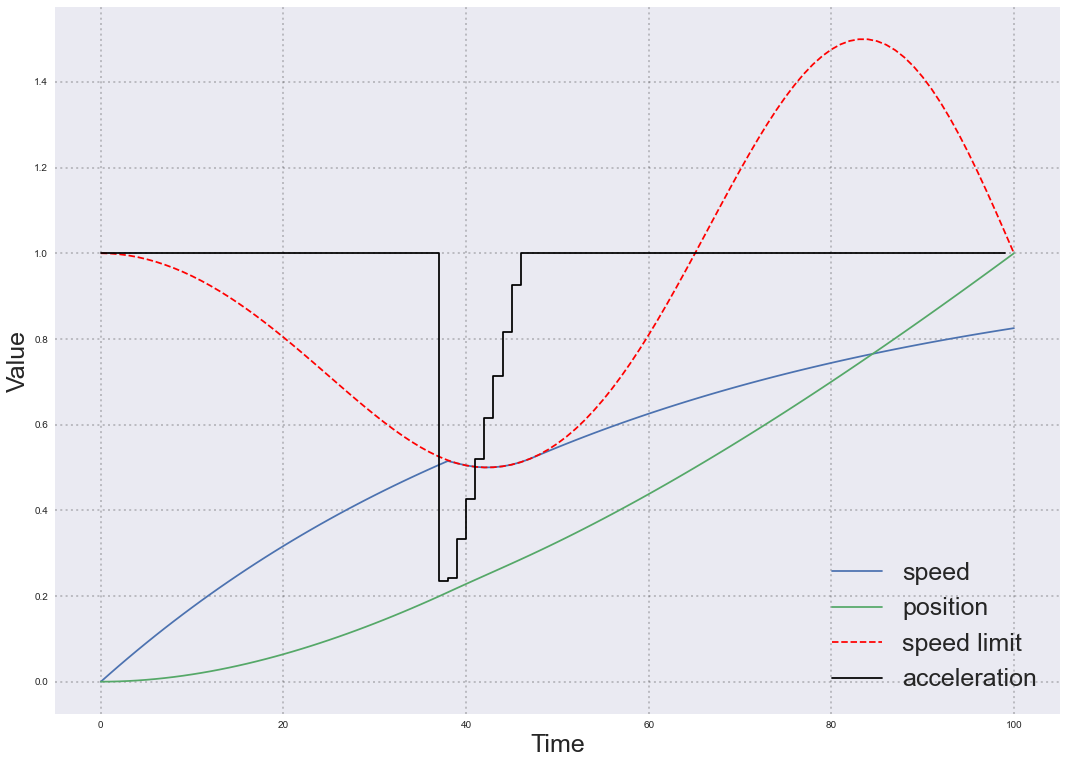

In [5]:
plt.figure(figsize=[18, 13])
# plt.axes()
plt.plot(sol.value(speed),label="speed")
plt.plot(sol.value(pos),label="position")
plt.plot(limit(sol.value(pos)),'r--',label="speed limit")
plt.step(range(N),sol.value(U),'k',label="acceleration")
plt.legend(loc="lower right", fontsize=25)
plt.grid(b=True, color='black', alpha=0.2, linestyle=':', linewidth=2)
# plt.rcParams['figure.figsize'] = [15, 10] #[width, height]
plt.xlabel('Time', fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.show()

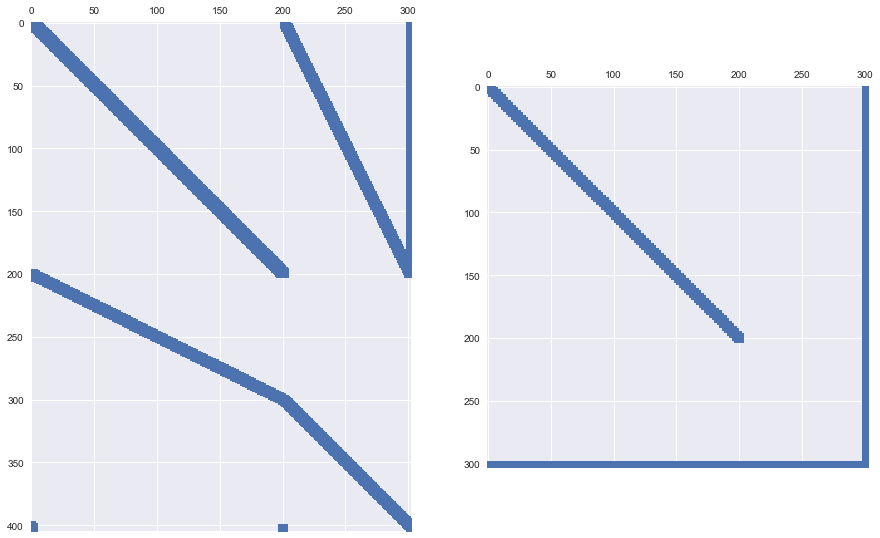

In [6]:
# Sparsity
plt.figure(figsize=[15, 10])
plt.subplot(1,2,1)
plt.spy(sol.value(jacobian(opti.g,opti.x)))
plt.subplot(1,2,2)
plt.spy(sol.value(hessian(opti.f+dot(opti.lam_g,opti.g),opti.x)[0]))

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Vehicle Steering Dynamics

**System Decription**

$\begin{align}
    \text{State:} & \ x, y, \theta \\
    \text{Control or, input:} & \ v, \delta \\
    \text{Output:} & \ x, y \\
    \text{Parameters:} & \  a, b, mx
\end{align}$

**State Dynamics**

$\begin{align}
\dot{x} &= v \ cos(\theta) \\
\dot{y} &= v \ sin(\theta) \\
\dot{\theta} &= \frac{v}{l} tan(\phi)
\end{align}$

**Parameters**
- wheelbase: $b = r_\text{r} \tan \delta$; 
- reference offset: $a = r_\text{r} \tan \alpha$; 
- maximum steer: $mx = tan \alpha = (a/b) tan \delta$

**Model Assumptions and Constraints**
- Assuming no slipping of the wheels, the motion of the vehicle is given by a rotation around a point `O` that depends on the steering angle $\delta$. 

- To compute the angle $\alpha$ of the `velocity of the reference point with respect to the axis of the vehicle`, we let the distance from the center of rotation `O` to the contact point of the rear wheel be $r_\text{r}$.

- Steering limit depends on speed. General limit is $0.5$ radians ($\approx 30$ degrees).

- Limit of $0.1$ radians ($\approx 6$ degrees) at 10 m/s ($\approx 35$ kph) and $0.05$ radians ($\approx 3$ degrees) at $30$ m/s ($\approx$ $110$ kph). 

- Note that a steering angle of $0.05$ rad gives a cross acceleration of $(v^2/b) \tan \delta \approx ($100/3$)\times 0.05 = 1.7$ $\text{m/s}^2$ at $10$ m/s and $15$ $\text{m/s}^2$ at $30$ m/s ($\approx$ $1.5$ times the force of gravity).

## Lane Change Maneuver

We consider an optimal control problem that consists of “changing lanes” by moving from the point $x = 0$, $y = -2$, $\theta = 0$ to the point $x = 100$, $y = 2$, $\theta = 0$) over a period of $10$ seconds and with a with a starting and ending velocity of $10$ m/s:

State Dynamics
$$\dot{x} = v \ cos(\theta)$$
$$\dot{y} = v \ sin(\theta)$$
$$\dot{\theta} = \frac{v}{l} tan(\phi)$$



In [8]:
def vehicle_update(t, x, u, params):
    # Get the parameters for the model
    l = params.get('wheelbase', 3.)         # vehicle wheelbase
    phimax = params.get('maxsteer', 0.5)    # max steering angle (rad)

    # Saturate the steering input
    phi = np.clip(u[1], -phimax, phimax)

    # Return the derivative of the state
    return np.array([
        np.cos(x[2]) * u[0],            # xdot = cos(theta) v
        np.sin(x[2]) * u[0],            # ydot = sin(theta) v
        (u[0] / l) * np.tan(phi)        # thdot = v/l tan(phi)
    ])

def vehicle_output(t, x, u, params):
    return x                            # return x, y, theta (full state)

# Define the vehicle steering dynamics as an input/output system
vehicle = ct.NonlinearIOSystem(vehicle_update, vehicle_output, states=3, name='vehicle',
                                    inputs=('v', 'phi'),
                                    outputs=('x', 'y', 'theta'))

In [9]:
x0 = [0., -1., 0.]; u0 = [5., 0.]    # Initial State and Control
xf = [100., 2., 0.]; uf = [10., 0.]  # Final Conditions
Tf = 10                               # Final Time

**cost function** that penalizes the state and input using quadratic cost functions:

In [10]:
Q = np.diag([0.1, 10, .1])    # keep lateral error low
R = np.eye(2) * 0.1
cost = opt.quadratic_cost(vehicle, Q, R, x0=xf, u0=uf)

We also **constraint** the maximum turning rate to $0.1$ radians (about $6$ degees) and constrain the velocity to be in the range of $9$ m/s to $11$ m/s:

In [11]:
constraints = [ opt.input_range_constraint(vehicle, [8, -0.1], [12, 0.1]) ]

In [12]:
horizon = np.linspace(0, Tf, 20, endpoint=True)

# slight left veer
bend_left = [10, 0.01]                             

# set step size for gradient calculation
result = opt.solve_ocp(vehicle, horizon, x0, cost, constraints, initial_guess=bend_left,
                            options={'eps': 0.01})    
# Extract the results
u = result.inputs
t, y = ct.input_output_response(vehicle, horizon, u, x0)

Summary statistics:
* Cost function calls: 42
* Constraint calls: 84
* System simulations: 123


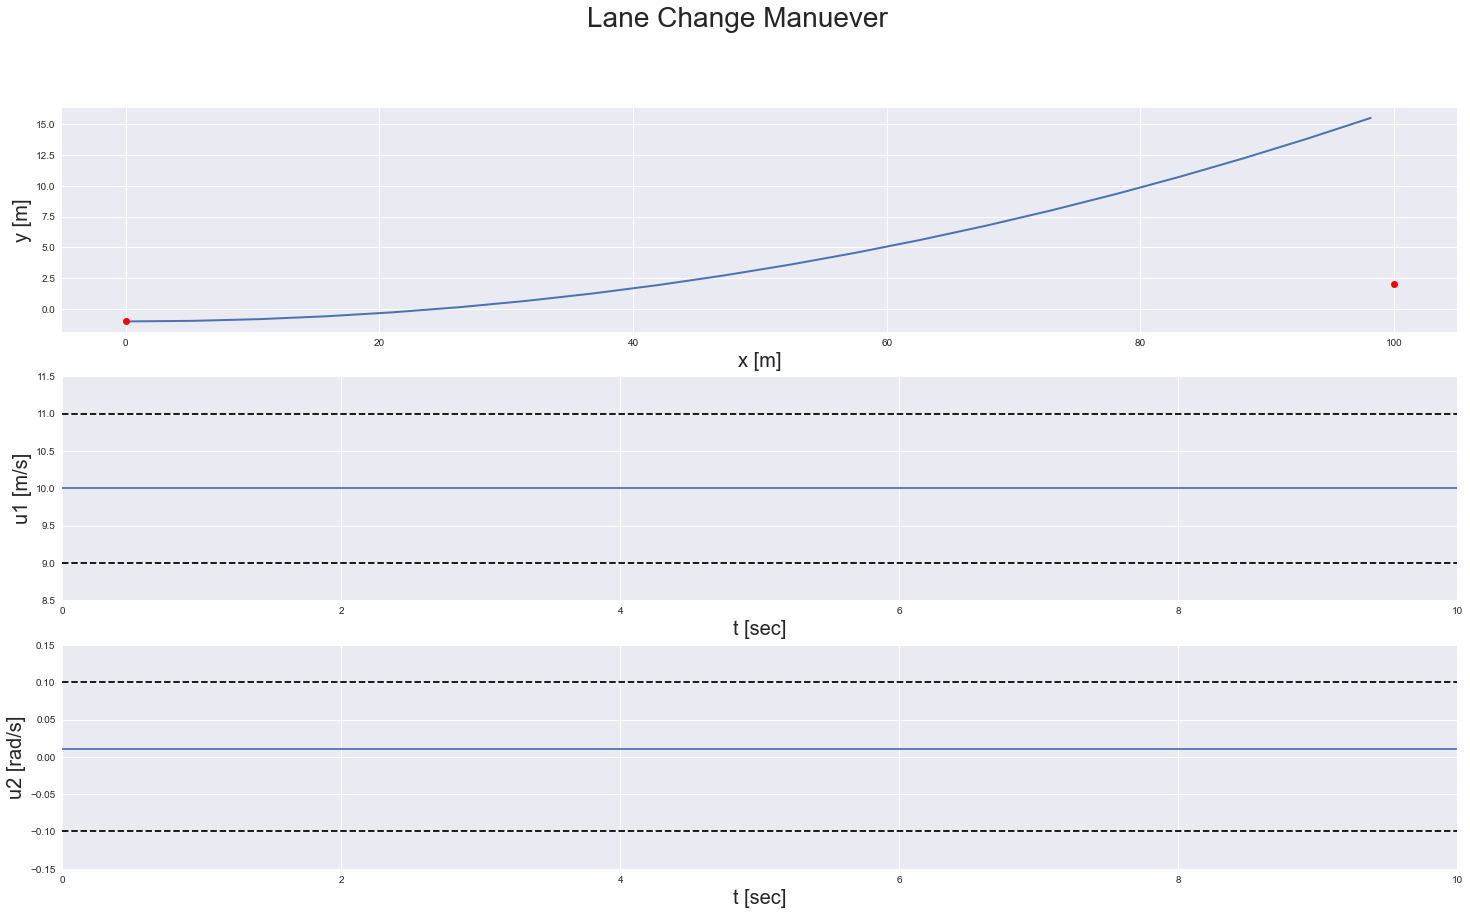

In [13]:
plt.figure(figsize=[25, 14])

plt.subplot(3, 1, 1)
plt.plot(y[0], y[1], linewidth=2)
plt.plot(x0[0], x0[1], 'ro', xf[0], xf[1], 'ro')
plt.xlabel("x [m]", size=20)
plt.ylabel("y [m]", size=20)

plt.subplot(3, 1, 2)
plt.plot(t, u[0])
plt.axis([0, 10, 8.5, 11.5])
plt.plot([0, 10], [9, 9], 'k--', [0, 10], [11, 11], 'k--')
plt.xlabel("t [sec]", size=20)
plt.ylabel("u1 [m/s]", size=20)

plt.subplot(3, 1, 3)
plt.plot(t, u[1])
plt.axis([0, 10, -0.15, 0.15])
plt.plot([0, 10], [-0.1, -0.1], 'k--', [0, 10], [0.1, 0.1], 'k--')
plt.xlabel("t [sec]", size=20)
plt.ylabel("u2 [rad/s]", size=20)

plt.suptitle("Lane Change Manuever", size=28)
# plt.tight_layout()
plt.show()   

# Dynamic Programming: Van der Pol Oscillator 

+ minimize a quadratic cost
+ In dynamics, the Van der Pol oscillator is a non-conservative oscillator with non-linear damping. It evolves in time according to the second-order differential equation
+ oscilator to the origin
+ $x$ is the position co-ordinate
+ $x_1$ is the derivative of $x_0$


$$\begin{align} 
    \min_{x(.), u(.)} &  \quad  \int_{t_0}^{T} (x_0^2 + x_1^2 + u^2) dt \\
    \text{subject to :} & \\
    \dot{x_0} &= (1 - x_1^2) x_0 - x_1 + u   \\
    \dot{x_1} &= x_0  \\
    -1.0 \leq & u \leq 1.0, \quad x_1 \geq -0.25  \\
    x_0(0) &= 0,  \quad  x_1(0) = 1
\end{align}$$



In [14]:
from pylab import *
T = 10.         # Time Horizon
N = 20          # Number of control intervals
NK = 20         # Number of Runge-Kutta 4 steps per interval
DT = T/(N*NK)   # step size
NU = 101        # Number of discrete control values
NX = 101        # Number of discrete state values

# System dynamics, can be called with matrice x
def f(x1,x2,u):
  x1_dot = (1 - x2*x2)*x1 - x2 + u
  x2_dot = x1
  q_dot  = x1*x1 + x2*x2 + u*u
  return (x1_dot, x2_dot, q_dot)

# Control enumeration
U  = linspace(-1,1,NU)

# State space enumeration
x1 = linspace(-1,1,NX)
x2 = linspace(-1,1,NX)
X1,X2 = meshgrid(x1,x2)

# For each control action and state, precalculate next state and stage cost
stage_J = []
next_x1 = []
next_x2 = []
for u in U:
  # Take number of integration steps
  X1_k = copy(X1)
  X2_k = copy(X2)
  Q_k = zeros(X1.shape)
  for k in range(NK):
    # RK4 integration for x1, x2 and q
    k1_x1, k1_x2, k1_q = f(X1_k,                X2_k,                u)
    k2_x1, k2_x2, k2_q = f(X1_k + DT/2 * k1_x1, X2_k + DT/2 * k1_x2, u)
    k3_x1, k3_x2, k3_q = f(X1_k + DT/2 * k2_x1, X2_k + DT/2 * k2_x2, u)
    k4_x1, k4_x2, k4_q = f(X1_k + DT   * k3_x1, X2_k + DT   * k3_x2, u)
    X1_k += DT/6*(k1_x1 + 2*k2_x1 + 2*k3_x1 + k4_x1)
    X2_k += DT/6*(k1_x2 + 2*k2_x2 + 2*k3_x2 + k4_x2)
    Q_k  += DT/6*(k1_q  + 2*k2_q  + 2*k3_q  + k4_q )

  # Find out which state comes next (index)
  X1_k = matrix.round((X1_k+1)/2*(NX-1)).astype(int)
  X2_k = matrix.round((X2_k+1)/2*(NX-1)).astype(int)

  # Infinite cost if state gets out-of-bounds
  I = X1_k  <  0; Q_k[I]=inf; X1_k[I]=0
  I = X2_k  <  0; Q_k[I]=inf; X2_k[I]=0
  I = X1_k >= NX; Q_k[I]=inf; X1_k[I]=0
  I = X2_k >= NX; Q_k[I]=inf; X2_k[I]=0

  # Save the stage cost and next state
  next_x1.append(X1_k)
  next_x2.append(X2_k)
  stage_J.append(Q_k)

# Calculate cost-to-go (no end cost) and optimal control
J = zeros(X1.shape)
U_opt = []
for k in reversed(list(range(N))):
  # Cost to go for the previous step, optimal control action
  J_prev = inf*ones(X1.shape)
  u_prev = -ones(X1.shape,dtype=int)

  # Test all control actions
  for uind in range(NU):
    J_prev_test = J[next_x2[uind],next_x1[uind]]+stage_J[uind]
    better = J_prev_test<J_prev
    u_prev[better] = uind
    J_prev[better] = J_prev_test[better]

  # Update cost-to-go and save optimal control
  J = J_prev
  U_opt.append(u_prev)

# Reorder U_opt by stage
U_opt.reverse()

# Find optimal control starting at x1=0, x2=1
i1 = NX//2
i2 = NX-1
u_opt = []
x1_opt = [x1[i1]]
x2_opt = [x2[i2]]
cost = 0
for k in range(N):
  # Get the optimal control and go to next step
  u_ind = U_opt[k][i2,i1]
  cost += stage_J[u_ind][i2,i1]
  i1, i2 = next_x1[u_ind][i2,i1], next_x2[u_ind][i2,i1]

  # Save the trajectories
  u_opt.append(U[u_ind])
  x1_opt.append(x1[i1])
  x2_opt.append(x2[i2])

# Optimal cost
print("Minimal cost: ", cost)
assert abs(cost-J[NX-1,NX//2])<1e-8 # Consistency check



Minimal cost:  2.817428463884437


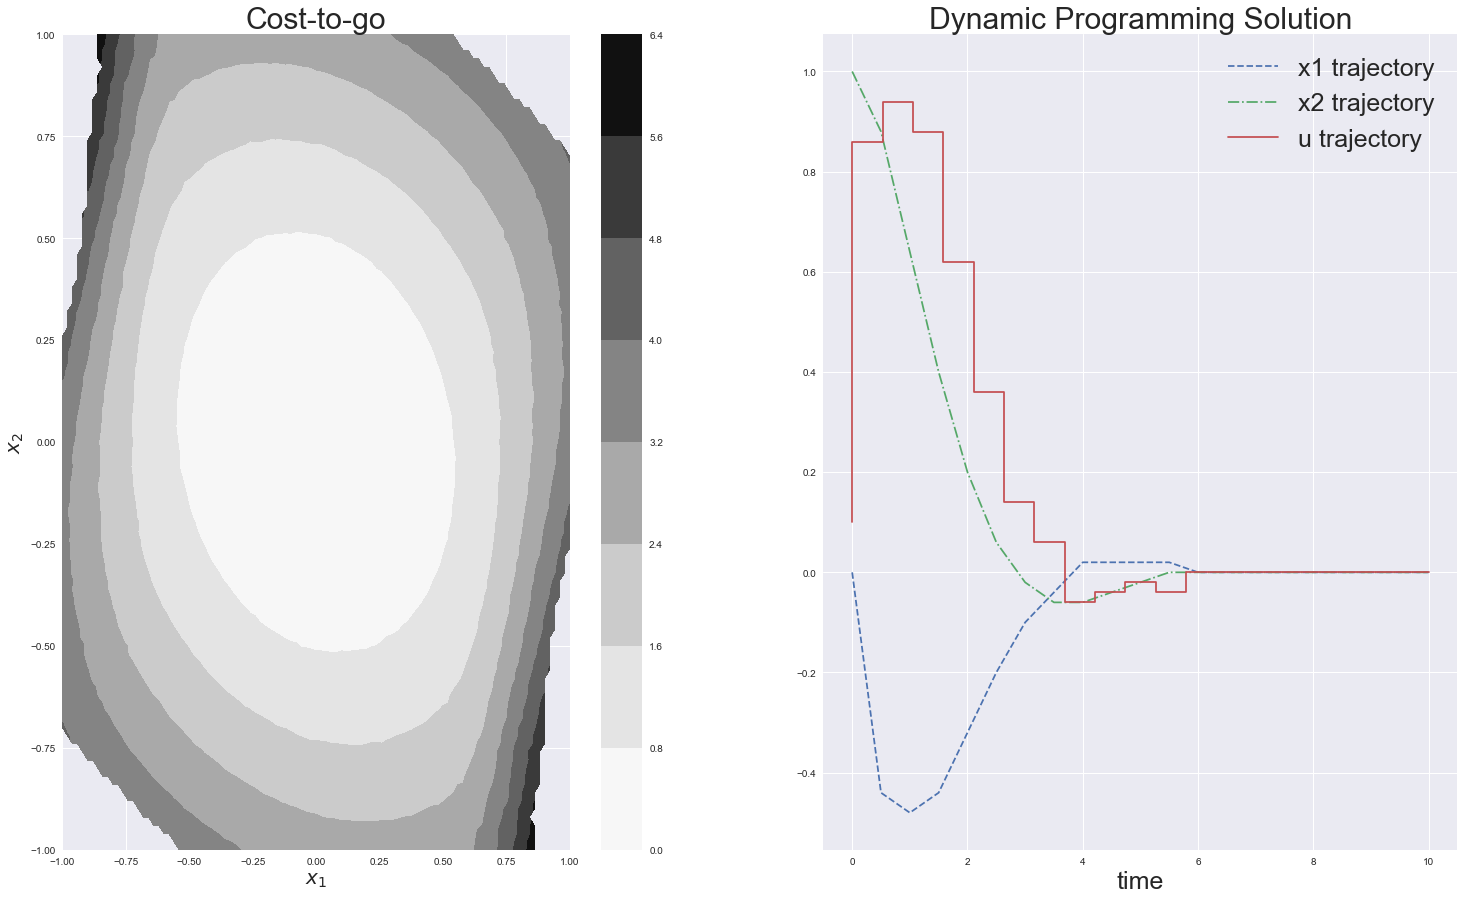

In [15]:
# Van der Pol Plot
plt.figure(figsize=[25, 15])

# Plot optimal cost-to-go
subplot(121)
contourf(X1,X2,J)
colorbar()
xlabel('$x_1$', size = 20)
ylabel('$x_2$', size = 20)
title('Cost-to-go', size = 30)

subplot(122)
plot(linspace(0,T,N+1),x1_opt,'--')
plot(linspace(0,T,N+1),x2_opt,'-.')
step(linspace(0,T,N),u_opt,'-')
plt.title("Dynamic Programming Solution", size = 30)
plt.xlabel('time', size = 25)
plt.legend(['x1 trajectory','x2 trajectory','u trajectory'], fontsize=25)
# plt.legend(loc="lower right", fontsize=20)
grid(True) 
show()


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        8
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

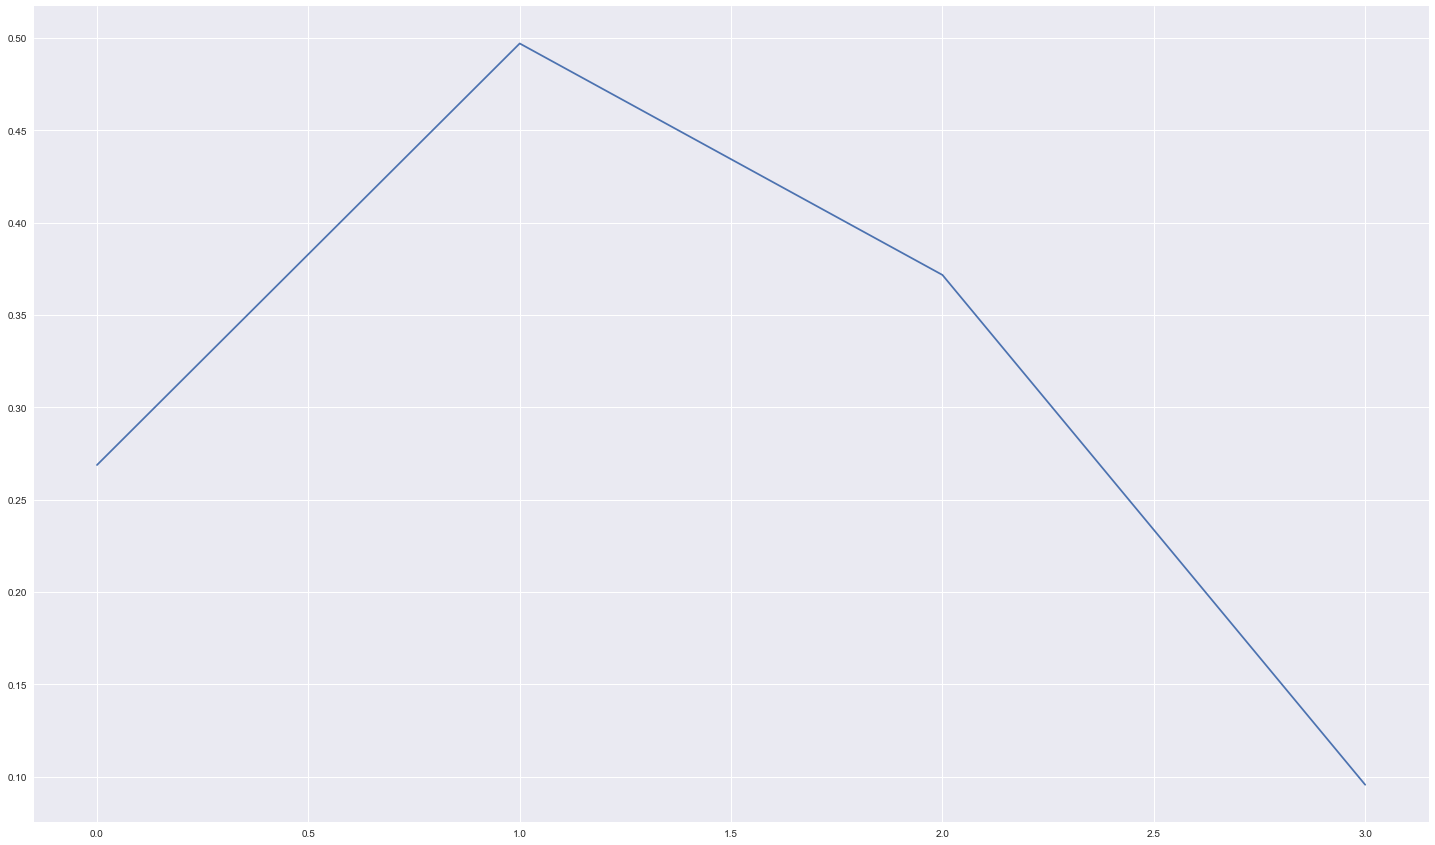

In [16]:
from casadi import *


x = MX.sym('x',2); # Two states
p = MX.sym('p');   # Free parameter

# Expression for ODE right-hand side
z = 1-x[1]**2;
rhs = vertcat(z*x[0]-x[1]+2*tanh(p),x[0])

# ODE declaration with free parameter
ode = {'x':x,'p':p,'ode':rhs}

# Construct a Function that integrates over 1s
F = integrator('F','cvodes',ode,{'tf':1})

# Control vector
u = MX.sym('u',4,1)

x = [0,1]  # Initial state
for k in range(4):
  # Integrate 1s forward in time:
  # call integrator symbolically
  res = F(x0=x,p=u[k])
  x = res["xf"]


# NLP declaration
nlp = {'x':u,'f':dot(u,u),'g':x};

# Solve using IPOPT
solver = nlpsol('solver','ipopt',nlp)
res = solver(x0=0.2,lbg=0,ubg=0)

plt.figure(figsize=[25, 15])
plt.plot(res["x"])

In [17]:
# gain scheduled control for vehicle steering
# import numpy as np
# import control as ct
from cmath import sqrt
# import matplotlib.pyplot as mpl

# Gain scheduled controller

- For this system we use a simple schedule on the forward vehicle velocity and place the poles of the system at fixed values.  
- The controller takes the current vehicle position and orientation plus the velocity velocity as inputs, and returns the velocity and steering commands.


**System Description:**

- System state: none
- System input: ex, ey, etheta, vd, phid
- System output: v, phi
- System parameters: longpole, latpole1, latpole2

In [18]:
def control_output(t, x, u, params):
    # Get the controller parameters
    longpole = params.get('longpole', -2.)
    latpole1 = params.get('latpole1', -1/2 + sqrt(-7)/2)
    latpole2 = params.get('latpole2', -1/2 - sqrt(-7)/2)
    l = params.get('wheelbase', 3)
    
    # Extract the system inputs
    ex, ey, etheta, vd, phid = u

    # Determine the controller gains
    alpha1 = -np.real(latpole1 + latpole2)
    alpha2 = np.real(latpole1 * latpole2)

    # Compute and return the control law
    v = -longpole * ex          # Note: no feedfwd (to make plot interesting)
    if vd != 0:
        phi = phid + (alpha1 * l) / vd * ey + (alpha2 * l) / vd * etheta
    else:
        # We aren't moving, so don't turn the steering wheel
        phi = phid
    
    return  np.array([v, phi])

# Define the controller as an input/output system
controller = ct.NonlinearIOSystem(
    None, control_output, name='controller',        # static system
    inputs=('ex', 'ey', 'etheta', 'vd', 'phid'),    # system inputs
    outputs=('v', 'phi')                            # system outputs
)



## Reference trajectory subsystem

- The reference trajectory block generates a simple trajectory for the system given the desired speed (vref) and lateral position (yref).  
The trajectory consists of a straight line of the form (vref * t, yref, 0) with nominal input (vref, 0).

**System Description:**

- System state: none
- System input: vref, yref
- System output: xd, yd, thetad, vd, phid
- System parameters: none


In [19]:
def trajgen_output(t, x, u, params):
    vref, yref = u
    return np.array([vref * t, yref, 0, vref, 0])

# Define the trajectory generator as an input/output system
trajgen = ct.NonlinearIOSystem(
    None, trajgen_output, name='trajgen',
    inputs=('vref', 'yref'),
    outputs=('xd', 'yd', 'thetad', 'vd', 'phid'))



## System construction

The input to the full closed loop system is the desired lateral position and the desired forward velocity.  The output for the system is taken as the full vehicle state plus the velocity of the vehicle.  The following diagram summarizes the interconnections:


We construct the system using the InterconnectedSystem constructor and using signal labels to keep track of everything.  

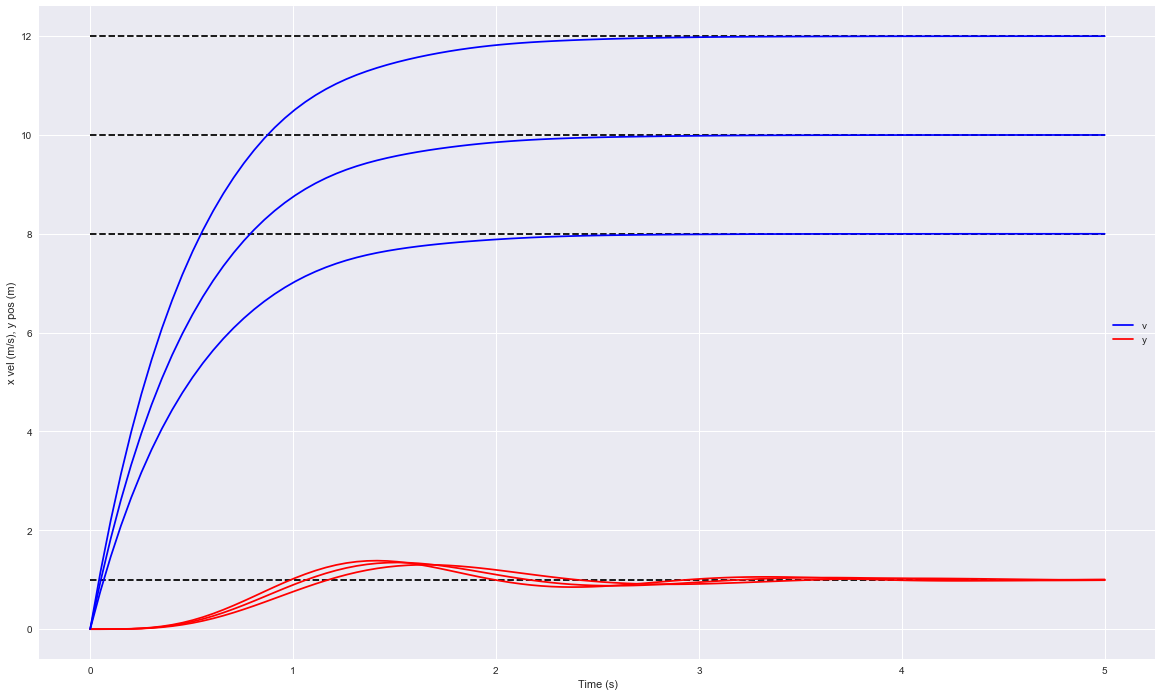

In [20]:
steering = ct.InterconnectedSystem(
    # List of subsystems
    (trajgen, controller, vehicle), name='steering',

    # Interconnections between  subsystems
    connections=(
        ['controller.ex', 'trajgen.xd', '-vehicle.x'],
        ['controller.ey', 'trajgen.yd', '-vehicle.y'],
        ['controller.etheta', 'trajgen.thetad', '-vehicle.theta'],
        ['controller.vd', 'trajgen.vd'],
        ['controller.phid', 'trajgen.phid'],
        ['vehicle.v', 'controller.v'],
        ['vehicle.phi', 'controller.phi']
    ),

    # System inputs
    inplist=['trajgen.vref', 'trajgen.yref'],
    inputs=['yref', 'vref'],

    #  System outputs
    outlist=['vehicle.x', 'vehicle.y', 'vehicle.theta', 'controller.v',
             'controller.phi'],
    outputs=['x', 'y', 'theta', 'v', 'phi']
)

# Set up the simulation conditions
yref = 1
T = np.linspace(0, 5, 100)

# Set up a figure for plotting the results
plt.figure(figsize=[20, 12])
plt.clf()

# Plot the reference trajectory for the y position
plt.plot([0, 5], [yref, yref], 'k--')

# Find the signals we want to plot
y_index = steering.find_output('y')
v_index = steering.find_output('v')

# Do an iteration through different speeds
for vref in [8, 10, 12]:
    # Simulate the closed loop controller response
    tout, yout = ct.input_output_response(steering, T, [vref * np.ones(len(T)), yref * np.ones(len(T))])

    # Plot the reference speed
    plt.plot([0, 5], [vref, vref], 'k--')

    # Plot the system output
    y_line, = plt.plot(tout, yout[y_index, :], 'r')  # lateral position
    v_line, = plt.plot(tout, yout[v_index, :], 'b')  # vehicle velocity

# Add axis labels
plt.xlabel('Time (s)')
plt.ylabel('x vel (m/s), y pos (m)')
plt.legend((v_line, y_line), ('v', 'y'), loc='center right', frameon=False)

Using logtime arrows

Using auto arrows



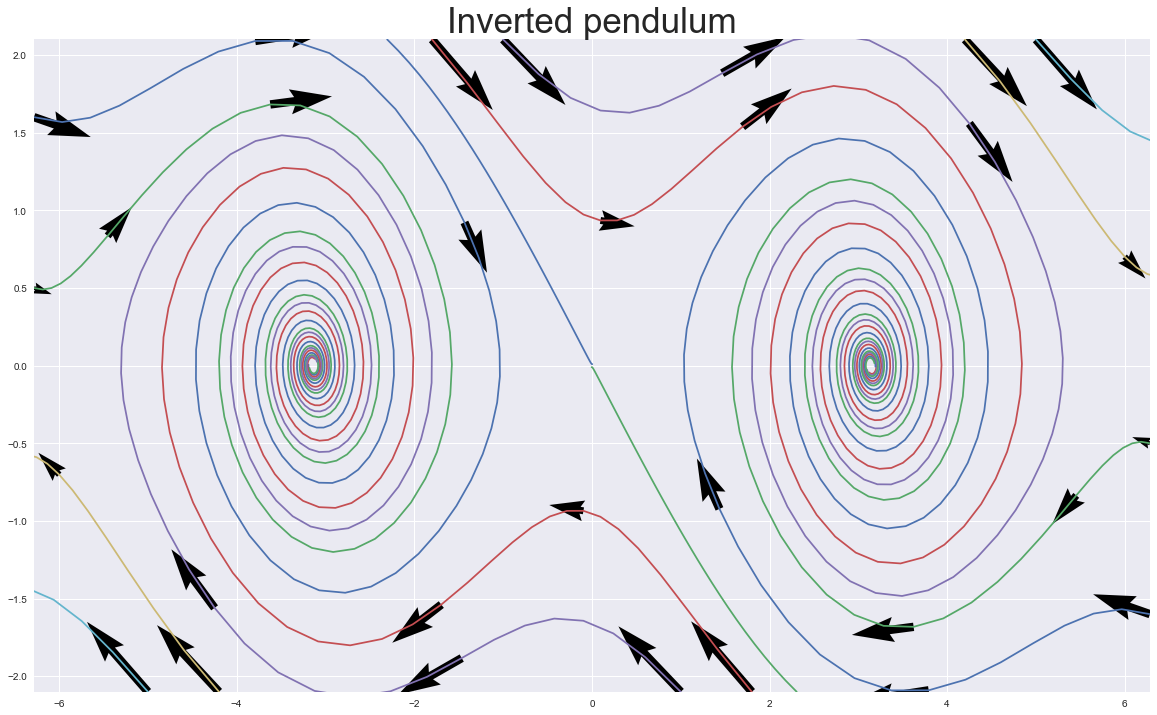

In [21]:
# This file contains examples of phase portraits pulled from "Feedback
# Systems" by Astrom and Murray (Princeton University Press, 2008).

import os
import numpy as np
import matplotlib.pyplot as plt
from control.phaseplot import phase_plot
from numpy import pi

# Inverted pendulum

# Define the ODEs for a damped (inverted) pendulum
def invpend_ode(x, t, m=1., l=1., b=0.2, g=1):
    return x[1], -b/m*x[1] + (g*l/m)*np.sin(x[0])


# Set up the figure the way we want it to look
plt.figure(figsize=[20, 12])
plt.clf()
plt.axis([-2*pi, 2*pi, -2.1, 2.1])
plt.title('Inverted pendulum', size=35)

# Outer trajectories
phase_plot(
    invpend_ode,
    X0=[[-2*pi, 1.6], [-2*pi, 0.5], [-1.8, 2.1],
        [-1, 2.1], [4.2, 2.1], [5, 2.1],
        [2*pi, -1.6], [2*pi, -0.5], [1.8, -2.1],
        [1, -2.1], [-4.2, -2.1], [-5, -2.1]],
    T=np.linspace(0, 40, 200),
    logtime=(3, 0.7)
)

# Separatrices
phase_plot(invpend_ode, X0=[[-2.3056, 2.1], [2.3056, -2.1]], T=6, lingrid=0)

#
# Systems of ODEs: damped oscillator example (simulation + phase portrait)
#

def oscillator_ode(x, t, m=1., b=1, k=1):
    return x[1], -k/m*x[0] - b/m*x[1]


Text(0.5, 1.0, 'Damped oscillator, vector field')

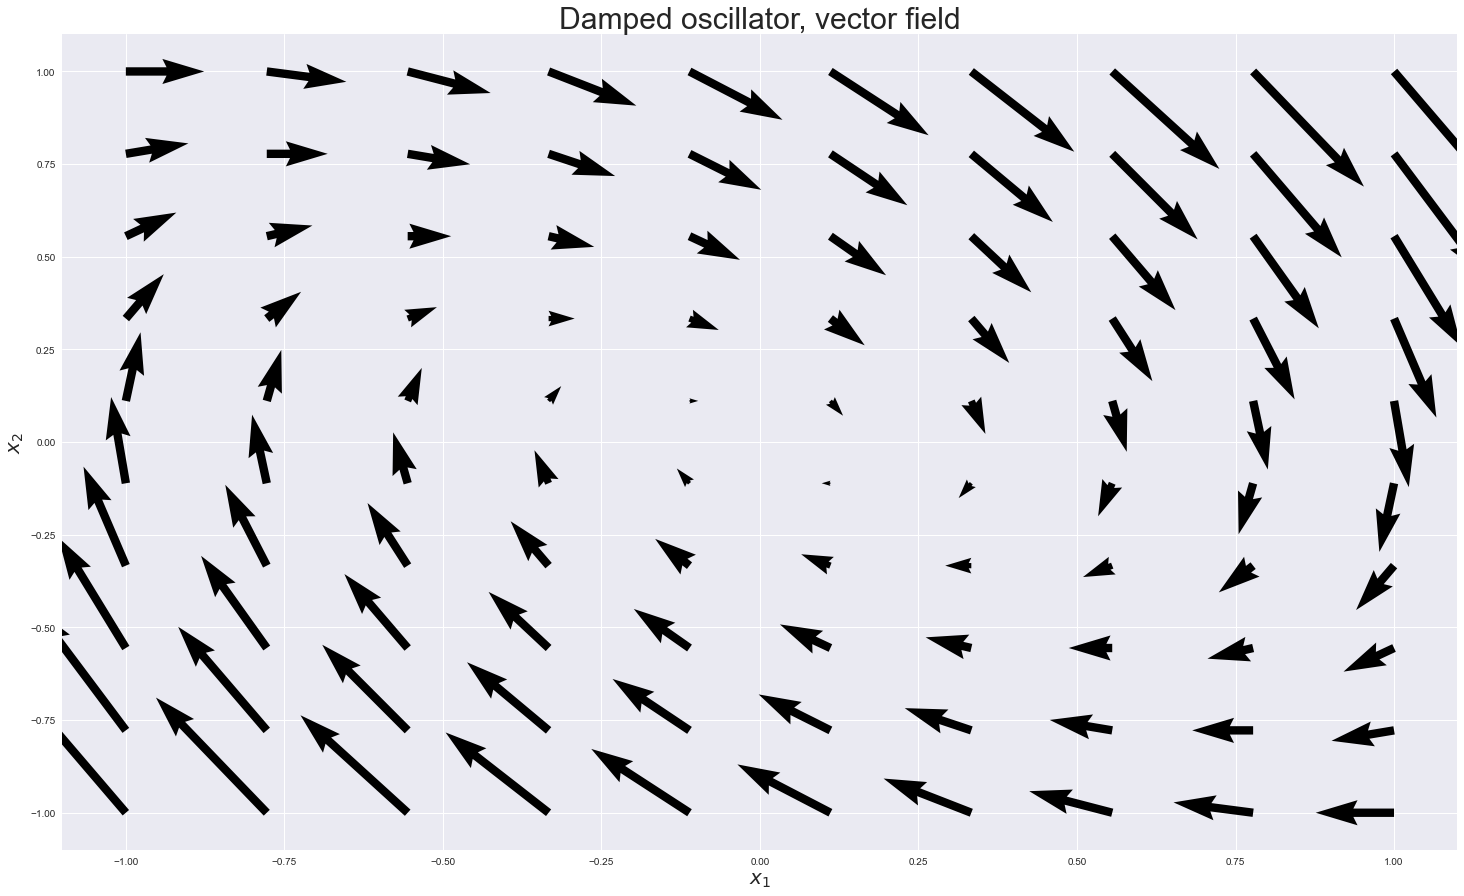

In [22]:
# Generate a vector plot for the damped oscillator
plt.figure(figsize=[25, 15])
plt.clf()
phase_plot(oscillator_ode, [-1, 1, 10], [-1, 1, 10], 0.15)
#plt.plot([0], [0], '.')
# a=gca; set(a,'FontSize',20); set(a,'DataAspectRatio',[1,1,1])
plt.xlabel('$x_1$', size =20)
plt.ylabel('$x_2$', size =20)
plt.title('Damped oscillator, vector field', size =30)



Text(0.5, 1.0, 'Damped oscillator, vector field and stream lines')

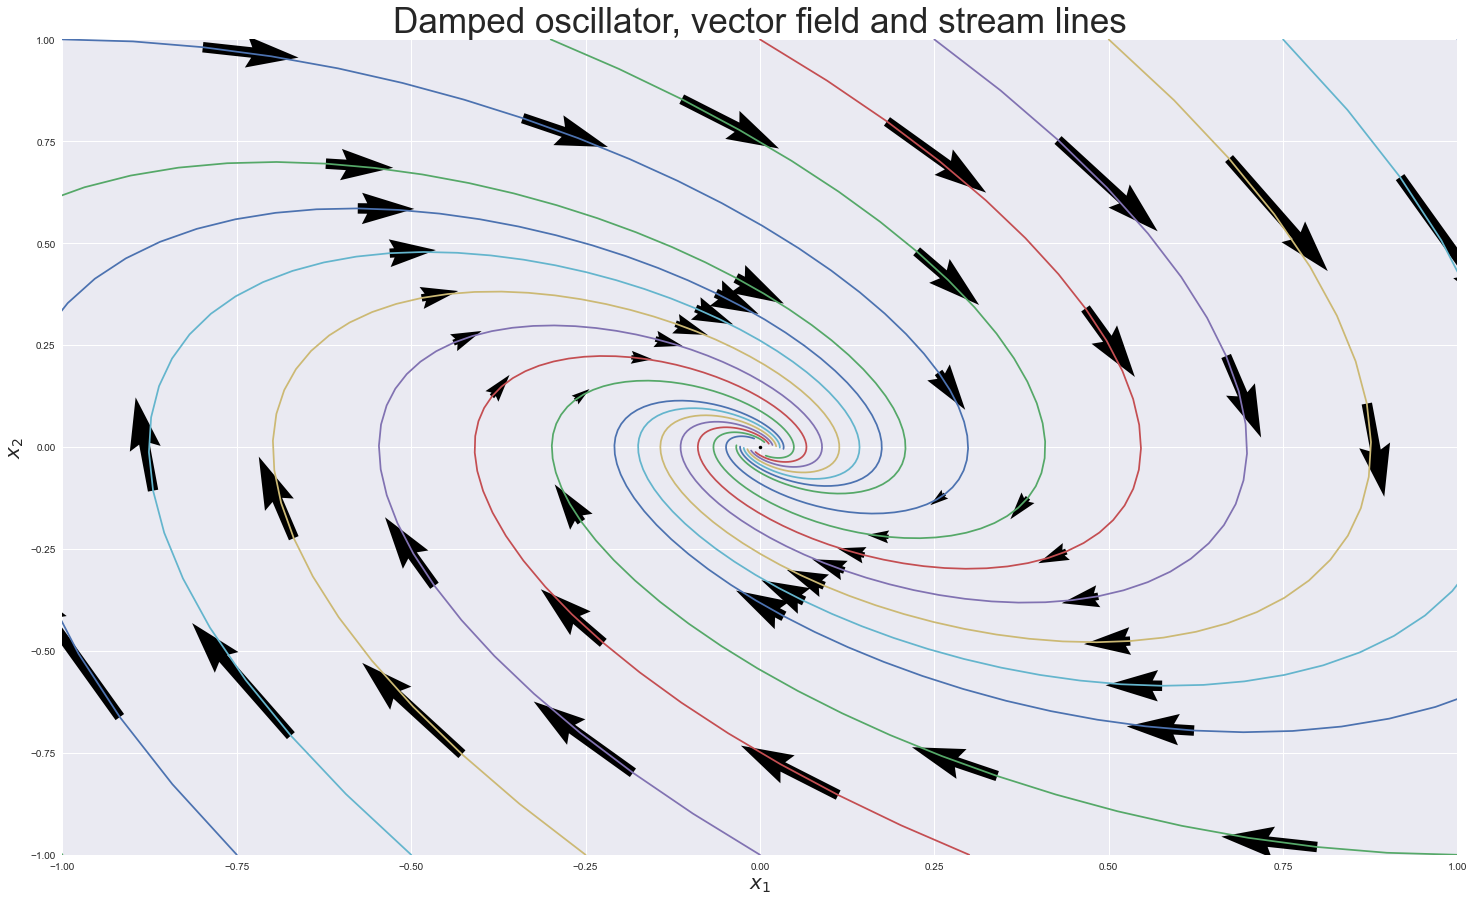

In [23]:
# Generate a phase plot for the damped oscillator
plt.figure(figsize=[25, 15])
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1, 1, 1]);
phase_plot(
    oscillator_ode,
    X0=[
        [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.75, 1], [1, 1],
        [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.75, -1], [-1, -1]
    ],
    T=np.linspace(0, 8, 80),
    timepts=[0.25, 0.8, 2, 3]
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# set(gca, 'DataAspectRatio', [1,1,1])
plt.xlabel('$x_1$', size =20)
plt.ylabel('$x_2$', size =20)
plt.title('Damped oscillator, vector field and stream lines', size =35)


Text(0.5, 1.0, 'Asymptotically stable point')

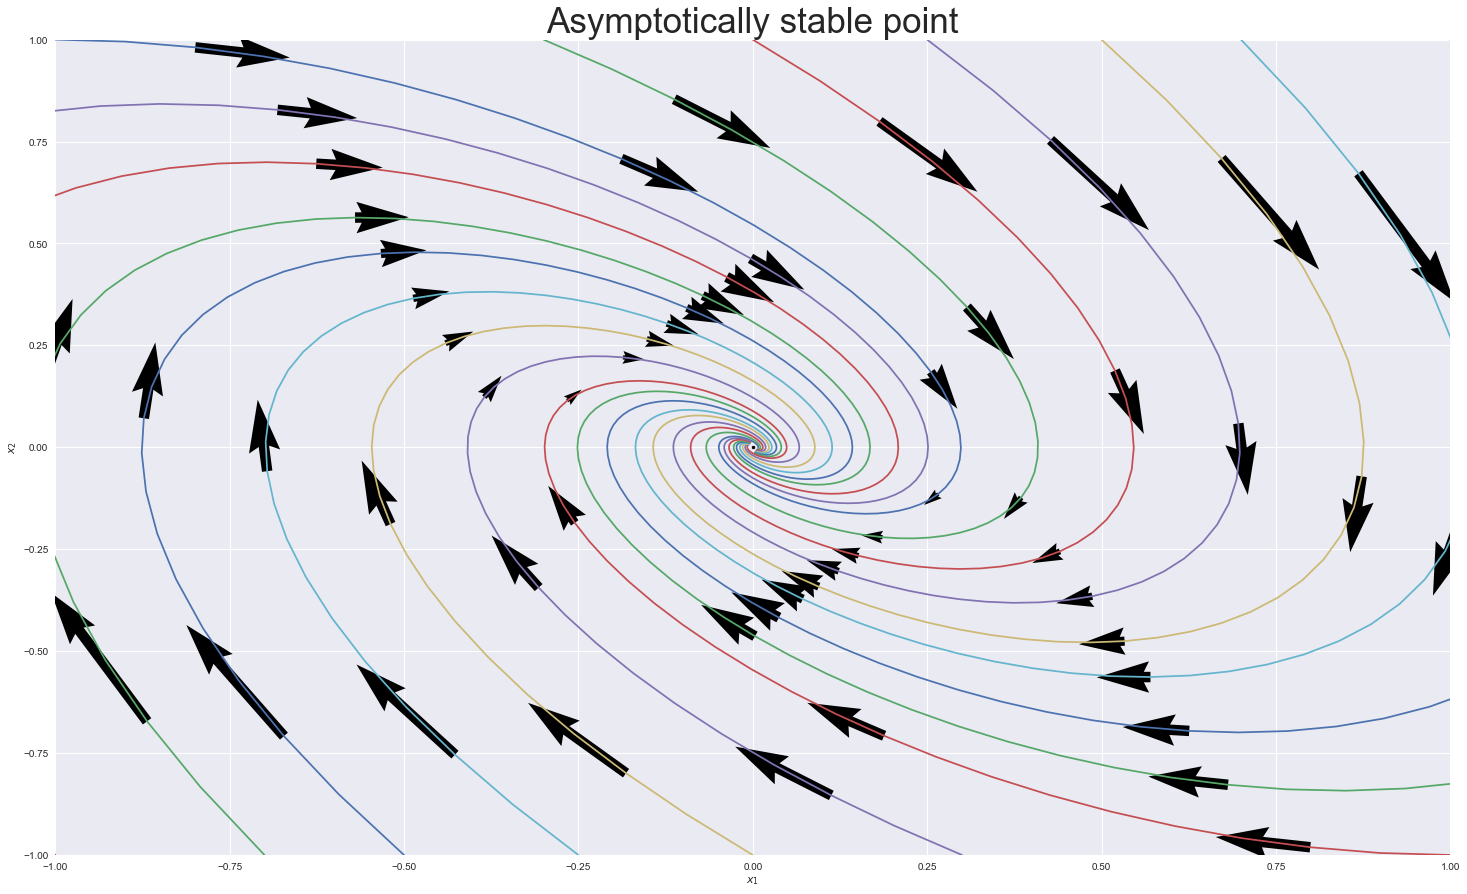

In [24]:
## Stability definitions ##
# This set of plots illustrates the various types of equilibrium points.
def saddle_ode(x, t):
    """Saddle point vector field"""
    return x[0] - 3*x[1], -3*x[0] + x[1]

# Asymptotic stable
m = 1
b = 1
k = 1  # default values

plt.figure(figsize=[25, 15])
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);
phase_plot(oscillator_ode,
            X0=[
                [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.7, 1], [1, 1], [1.3, 1],
                [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.7, -1], [-1, -1],
                [-1.3, -1]
            ],
    T=np.linspace(0, 10, 100),
    timepts=[0.3, 1, 2, 3],
    parms=(m, b, k)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Asymptotically stable point', size=35)

Text(0.5, 1.0, 'Saddle point')

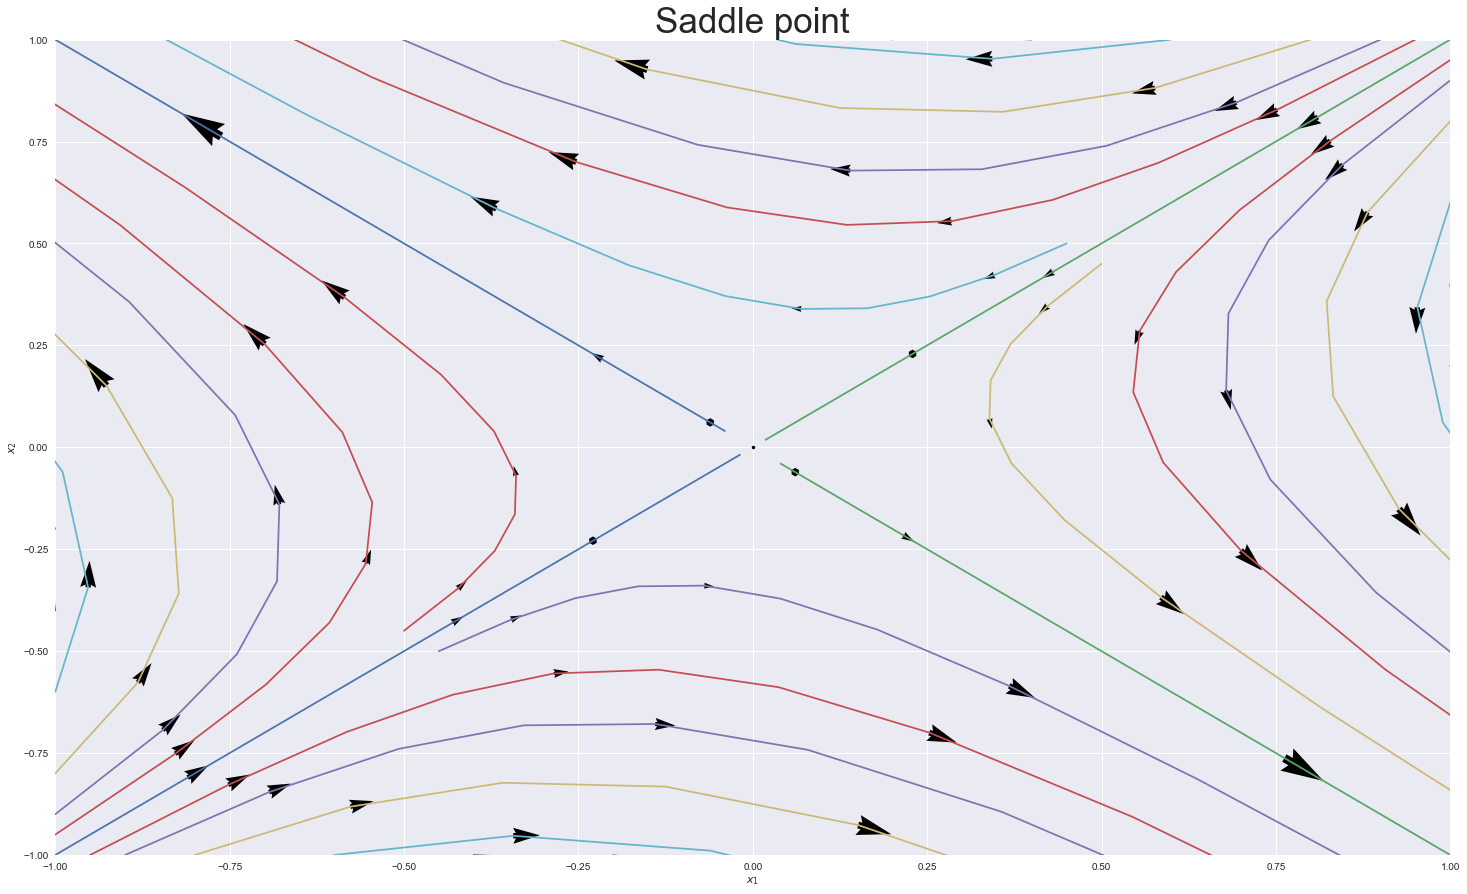

In [25]:
# Saddle
plt.figure(figsize=[25, 15])
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1])
phase_plot(
    saddle_ode,
    scale=2,
    timepts=[0.2, 0.5, 0.8],
    X0=[
        [-1, -1], [1, 1],
        [-1, -0.95], [-1, -0.9], [-1, -0.8], [-1, -0.6], [-1, -0.4], [-1, -0.2],
        [-0.95, -1], [-0.9, -1], [-0.8, -1], [-0.6, -1], [-0.4, -1], [-0.2, -1],
        [1, 0.95], [1, 0.9], [1, 0.8], [1, 0.6], [1, 0.4], [1, 0.2],
        [0.95, 1], [0.9, 1], [0.8, 1], [0.6, 1], [0.4, 1], [0.2, 1],
        [-0.5, -0.45], [-0.45, -0.5], [0.5, 0.45], [0.45, 0.5],
        [-0.04, 0.04], [0.04, -0.04]
    ],
    T=np.linspace(0, 2, 20)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Saddle point', size=35)

Text(0.5, 1.0, 'Undamped system\nLyapunov stable, not asymptotic stable')

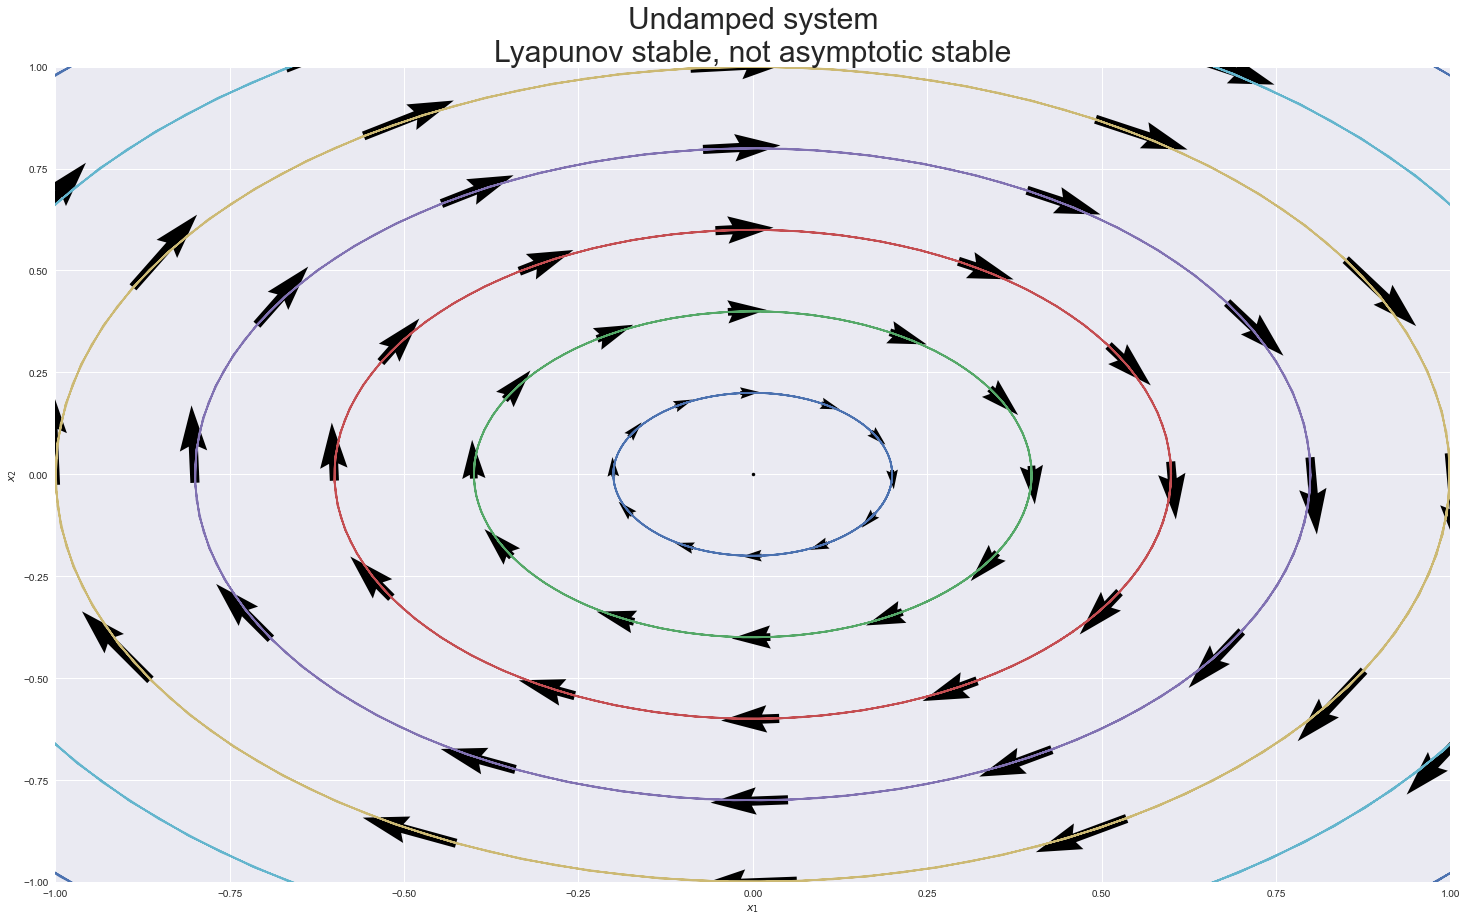

In [26]:
# Stable isL
m = 1
b = 0
k = 1  # zero damping
plt.figure(figsize=[25, 15])
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);
phase_plot(
    oscillator_ode,
    timepts=[pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6, pi, 7*pi/6,
             4*pi/3, 9*pi/6, 5*pi/3, 11*pi/6, 2*pi],
    X0=[[0.2, 0], [0.4, 0], [0.6, 0], [0.8, 0], [1, 0], [1.2, 0], [1.4, 0]],
    T=np.linspace(0, 20, 200),
    parms=(m, b, k)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Undamped system\nLyapunov stable, not asymptotic stable', size=30)